# Análisis de los datos del Dataset

### Importar librerías

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#### Cargar el DataSet

In [10]:
# Importamos el csv del DataSet y lo guardamos en la variable dataset

dataset = pd.read_csv("archivo_gym_members_exercise_tracking_version1.csv")

### Descripción general del Dataset

In [22]:
# Comenzamos con una descripción básica del dataset: número de filas, columnas, nombres de las columnas y los tipos de datos

print(f"Dimensiones del Dataset: {dataset.shape}\n")
print(f"Tipos de datos de las columnas:\n{dataset.dtypes}")

Dimensiones del Dataset: (973, 16)

Tipos de datos de las columnas:
id                                 int64
Age                                int64
Gender                             int64
Weight (kg)                      float64
Height (m)                       float64
Max_BPM                            int64
Avg_BPM                            int64
Resting_BPM                        int64
Session_Duration (hours)         float64
Calories_Burned                  float64
Workout_Type                      object
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)      int64
Experience_Level                   int64
BMI                              float64
dtype: object


### Análisis de valores nulos

In [18]:
# Identificamos si alguna columna tiene valores nulos y la cantidad de datos faltantes por columna.
# Esto es determinante hacerlo, ya que si obtenemos valores nulos o vacíos, pueden afectar el análisis y los modelos predictivos

print(f"Valores nulos por columna:\n\n{dataset.isnull().sum()}")

Valores nulos por columna:

id                               0
Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64


### Estadísticas descriptivas

In [17]:
# Estadísticas descriptivas para variables numéricas
# Calculamos estadísticas como la media, mediana, desviación estándar, los valores mínimos y máximos, etc. para las columnas numéricas.
# Esto nos dará una visión rápida de cómo se distribuyen los datos en términos de tendencia central y dispersión.

print(f"Estadísticas descriptivas:\n\n{dataset.describe()}")

Estadísticas descriptivas:

               id         Age      Gender  Weight (kg)  Height (m)  \
count  973.000000  973.000000  973.000000   973.000000   973.00000   
mean   487.000000   38.683453    0.525180    73.854676     1.72258   
std    281.025206   12.180928    0.499622    21.207500     0.12772   
min      1.000000   18.000000    0.000000    40.000000     1.50000   
25%    244.000000   28.000000    0.000000    58.100000     1.62000   
50%    487.000000   40.000000    1.000000    70.000000     1.71000   
75%    730.000000   49.000000    1.000000    86.000000     1.80000   
max    973.000000   59.000000    1.000000   129.900000     2.00000   

          Max_BPM     Avg_BPM  Resting_BPM  Session_Duration (hours)  \
count  973.000000  973.000000   973.000000                973.000000   
mean   179.883864  143.766701    62.223022                  1.256423   
std     11.525686   14.345101     7.327060                  0.343033   
min    160.000000  120.000000    50.000000           

### Distribución de variables numéricas

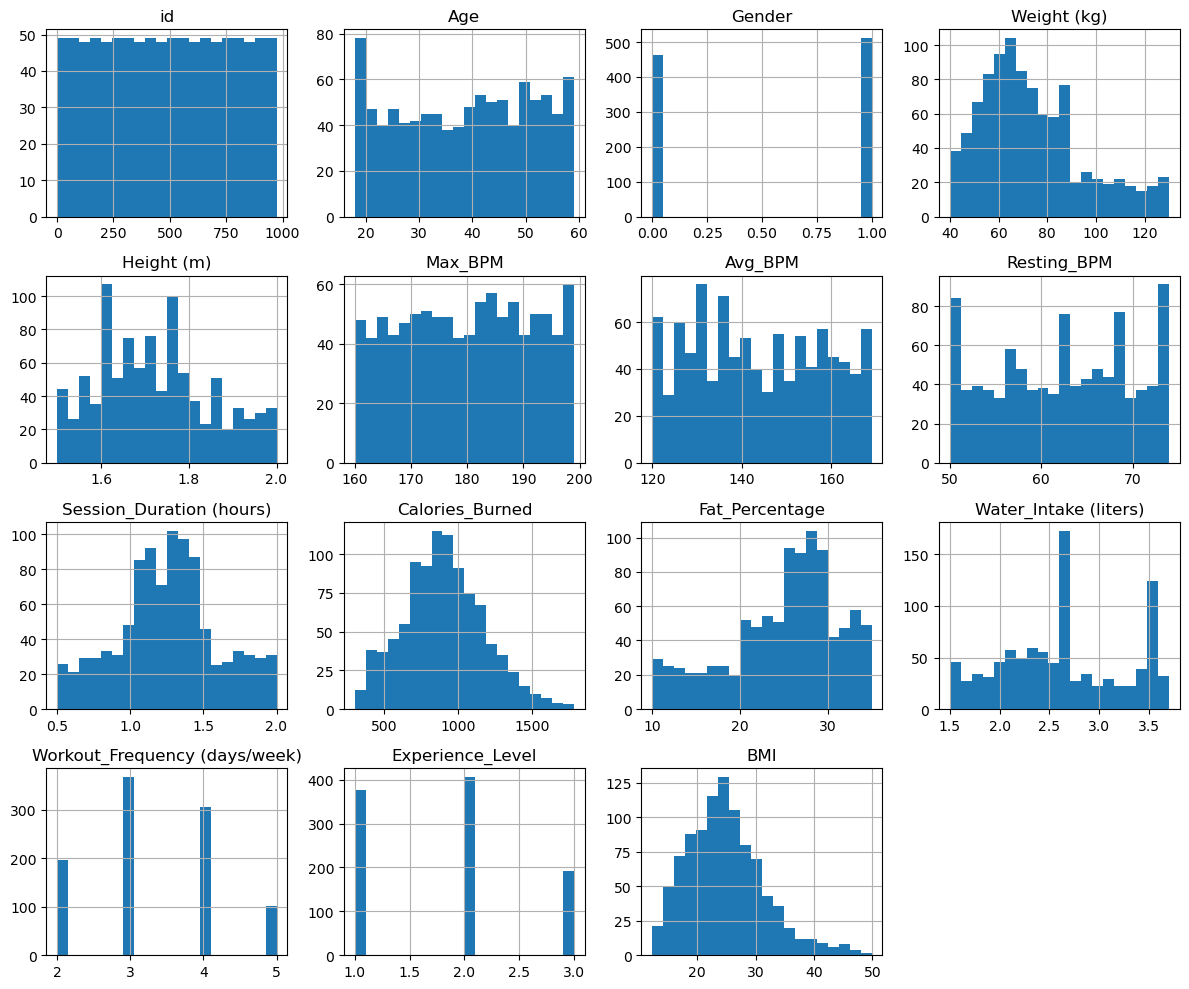

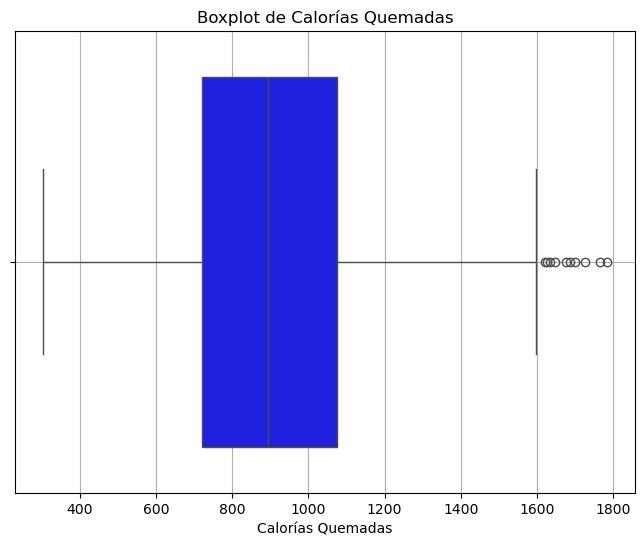

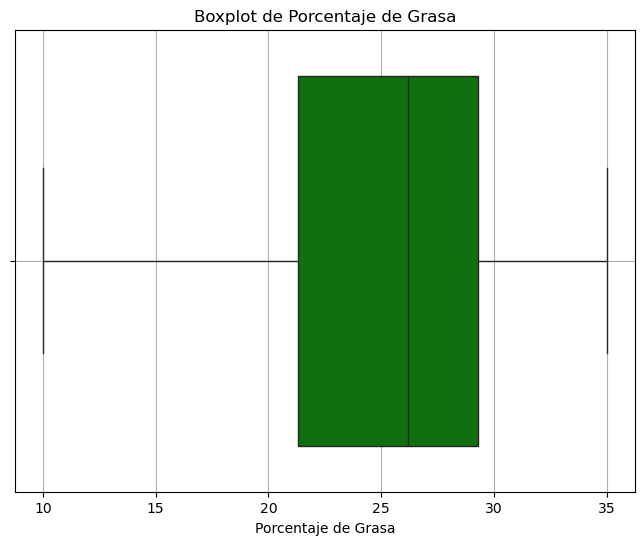

In [25]:
# Grafica de histogramas para las variables numéricas
dataset.hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.show()

# Grafica de boxplots para algunas variables claves
# 1. Boxplot para Calorías quemadas
plt.figure(figsize=(8, 6))
sns.boxplot(x=dataset['Calories_Burned'], color='blue')
plt.title('Boxplot de Calorías Quemadas')
plt.xlabel('Calorías Quemadas')
plt.grid(True)
plt.show()

# 2. Boxplot para Porcentaje de Grasa
plt.figure(figsize=(8, 6))
sns.boxplot(x=dataset['Fat_Percentage'], color='green')
plt.title('Boxplot de Porcentaje de Grasa')
plt.xlabel('Porcentaje de Grasa')
plt.grid(True)
plt.show()

### Correlación entre variables

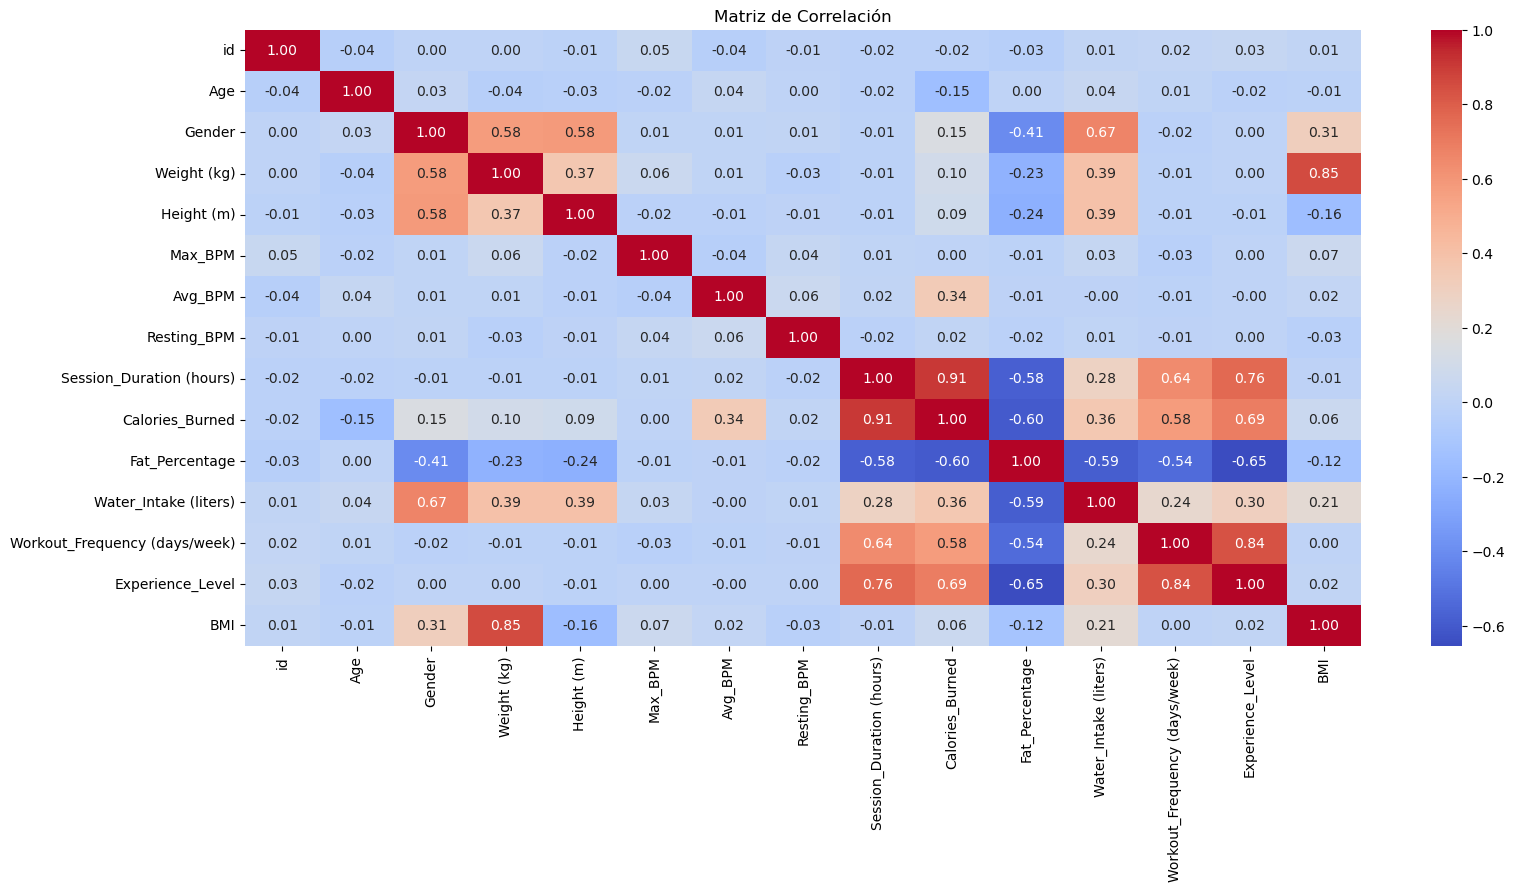

In [40]:
# Analizamos la correlación entre las variables numéricas para identificar relaciones importantes. Esto ayuda a descubrir cómo interactúan entre sí las características del dataset.

# Antes de eso vamos a seleccionar solo las columnas numéricas, excluyendo 'Workout_Type'
numeric_columns = dataset.select_dtypes(include=['number'])

plt.figure(figsize=(18, 8))
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()



### Análisis de variables categóricas

Distribución de Gender:
Gender
1    511
0    462
Name: count, dtype: int64


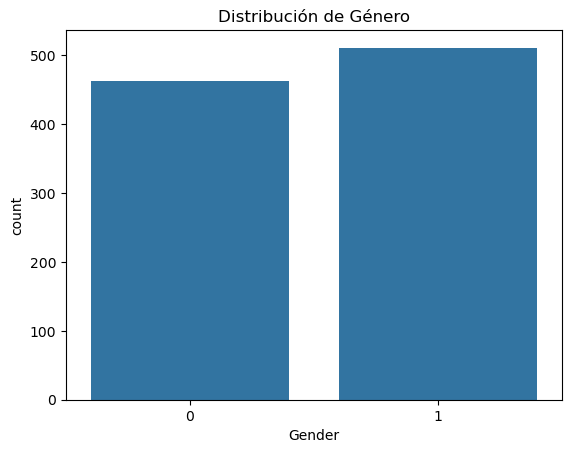

Distribución de Workout_Type:
Workout_Type
Strength    258
Cardio      255
Yoga        239
HIIT        221
Name: count, dtype: int64


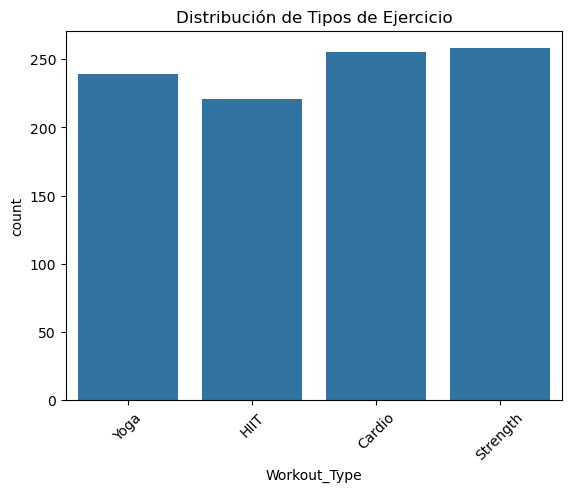

In [41]:
# Para las columnas categóricas (por ejemplo, "Gender" o "Workout_Type"), contaremos las frecuencias de cada categoría y haremos gráficos de barras para mostrar la distribución.

# Ver la distribución de la columna 'Gender'
print(f"Distribución de Gender:\n{dataset['Gender'].value_counts()}")

# Graficar la distribución de género
sns.countplot(x='Gender', data=dataset)
plt.title('Distribución de Género')
plt.show()

# Ver la distribución de la columna 'Workout_Type'
print(f"Distribución de Workout_Type:\n{dataset['Workout_Type'].value_counts()}")

# Graficar la distribución de tipos de ejercicio
sns.countplot(x='Workout_Type', data=dataset)
plt.title('Distribución de Tipos de Ejercicio')
plt.xticks(rotation=45)
plt.show()
